In [22]:
import matplotlib.pyplot as plt
import numpy as np

from constants import m_mw_dm, h_hubble
from pbhhalosim import PBHHaloSim

In [50]:
factor_inf = 1/3 + 1 / (2*9/4 - 3)

In [36]:
sim = PBHHaloSim(mass_dist=1e3, f_pbh=1, m_dm=10)
# Generate radial samples
rs = sim._radial_samples(10000000)
# Annihilation plateau radius. Same for all PBH halos.
r_cut = h_hubble * 1.3e-7 * (100./sim.m_dm * sim.sv/3e-26)**(4/9) * (sim.mass_dist/1.)**(1/3)

In [31]:
def r_tidal(m_pbh, r):
    return r * (m_pbh / m_mw_dm)**(1/3)

# PBHs' tidal radii, assuming circular orbits
r_tidals = r_tidal(sim.mass_dist, rs)

In [40]:
factors_tidal = 1 - 2/3 * (r_cut / r_tidals)**(3/2)

In [43]:
factors_tidal.min(), factors_tidal.max()

(0.8193205078816286, 0.9999999999978669)

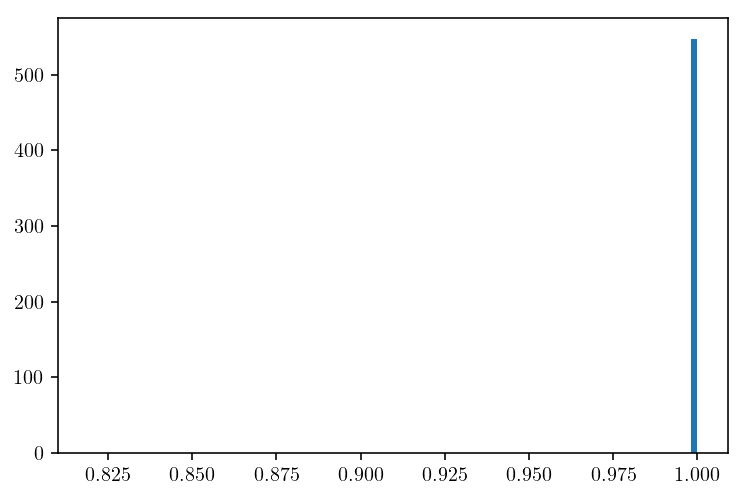

In [49]:
plt.hist(factors_tidal, density=True, bins=np.linspace(factors_tidal.min(), factors_tidal.max(), 100));